In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def plot_lineplot(data_path, mvg_avg_window=4, figsize=(10, 12)):
    # Load dataset
    df = pd.read_csv(data_path)
    
    # Assign episode number based on step resets
    df['episode'] = (df['step'] == 0).cumsum()
    
    # Aggregate statistics per episode
    episode_stats = df.groupby('episode').agg(
        total_steps=('step', 'max'),
        total_rewards=('reward', 'sum')
    ).reset_index()
    
    # Compute rolling average for rewards
    episode_stats['reward_std'] = df.groupby('episode')['reward'].std().reset_index(drop=True)
    episode_stats['rolling_avg_rewards'] = episode_stats['total_rewards'].rolling(window=mvg_avg_window).mean()
    
    # Calculate confidence intervals (95% CI)
    z = 1.96  # For 95% confidence interval
    episode_stats['reward_upper'] = episode_stats['total_rewards'] + z * (episode_stats['reward_std'] / np.sqrt(mvg_avg_window))
    episode_stats['reward_lower'] = episode_stats['total_rewards'] - z * (episode_stats['reward_std'] / np.sqrt(mvg_avg_window))
    
    # Plot
    fig, axs = plt.subplots(2, 1, figsize=figsize)
    
    # First subplot: Total steps per episode
    axs[0].plot(episode_stats['episode'], episode_stats['total_steps'], marker='o', color='blue', label='Total Steps')
    axs[0].set_title('Total Steps Per Episode', fontsize=16)
    axs[0].set_xlabel('Episode', fontsize=14)
    axs[0].set_ylabel('Steps', fontsize=14)
    axs[0].legend(fontsize=12)
    axs[0].grid(True, linestyle='--', alpha=0.6)
    
    # Second subplot: Total rewards per episode with rolling average and CI
    axs[1].plot(episode_stats['episode'], episode_stats['total_rewards'], marker='o', color='orange', label='Total Rewards')
    axs[1].fill_between(
        episode_stats['episode'],
        episode_stats['reward_lower'],
        episode_stats['reward_upper'],
        color='orange',
        alpha=0.2,
        label='95% CI'
    )
    axs[1].plot(episode_stats['episode'], episode_stats['rolling_avg_rewards'], color='red', linestyle='--', label=f'Avg Rewards ({mvg_avg_window} episodes)')
    axs[1].set_title('Total Rewards Per Episode', fontsize=16)
    axs[1].set_xlabel('Episode', fontsize=14)
    axs[1].set_ylabel('Rewards', fontsize=14)
    axs[1].legend(fontsize=12)
    axs[1].grid(True, linestyle='--', alpha=0.6)
    
    # Adjust layout and spacing
    fig.tight_layout(pad=3.0)
    
    # Show the plot
    plt.show()

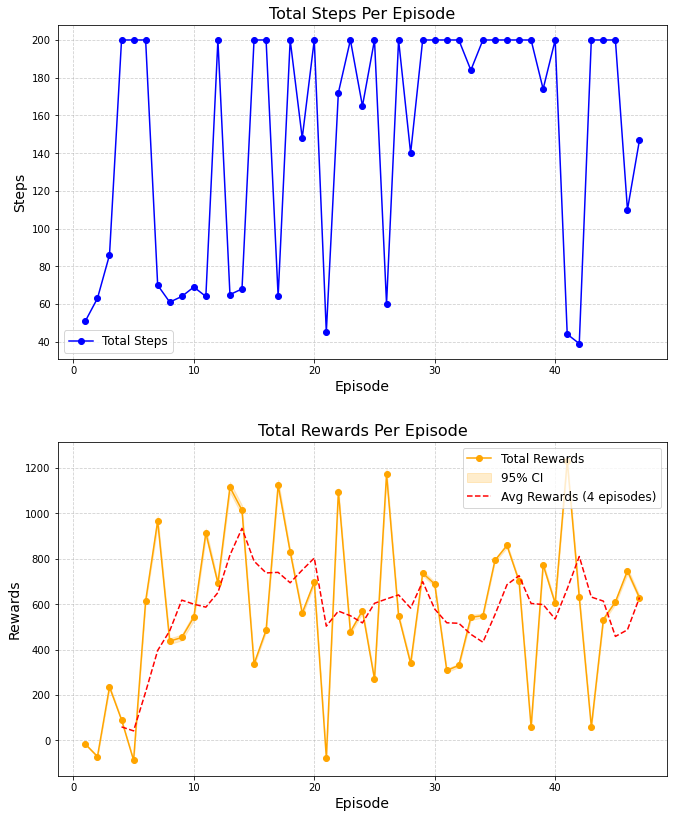

In [6]:
data_path = "./robobo_logs/training_log_final.csv"
plot_lineplot(data_path)